In [14]:
from ctypes import Array

import pandas as pd
import numpy as np
import glob
from PIL import Image
from tqdm import tqdm
import os
from numpy.random import RandomState

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy
from tqdm import tqdm
from joblib import Parallel, delayed
import subprocess

import sys
import os

import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import os
from tqdm import tqdm
from PIL import Image

import numpy

from numpy import (amin, amax, ravel, asarray, arange, ones, newaxis,
                   transpose, iscomplexobj, uint8, issubdtype, array)
import scipy.misc
from PIL import Image

In [15]:
def load_mask(path: str) -> int:
    data = np.array(Image.open(path))
    return 1 if np.any(data == 255) else 0

In [16]:
path = "/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/attributes/"
images = "/mnt/tank/scratch/nduginets/images/pix2pix_datasets/p2p_normalized_no_inst/l2s_bb_no_inst/test_latest/images"


0
[0]


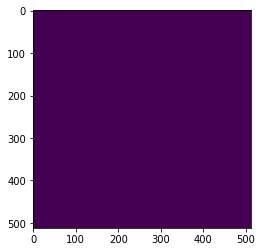

0
[0]


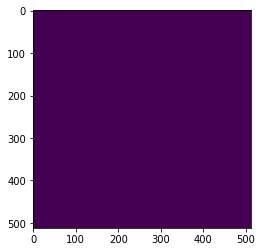

1
[  0 255]


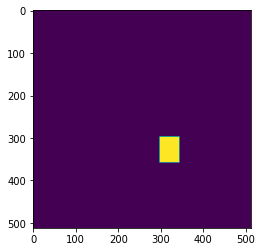

1
[  0 255]


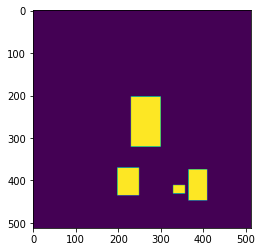

0
[0]


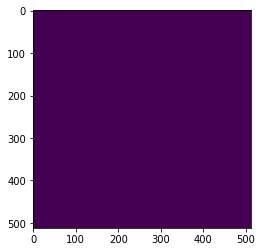

0
[0]


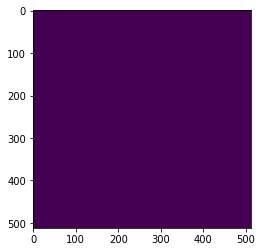

0
[0]


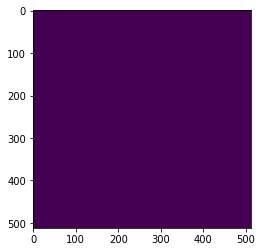

1
[  0 255]


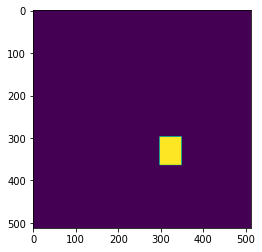

1
[  0 255]


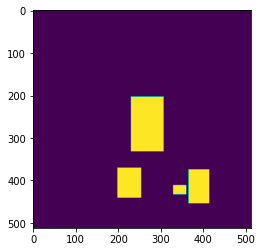

0
[0]


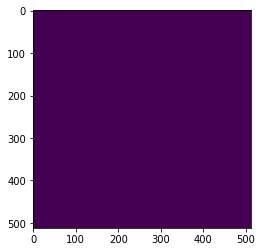

0
[0]


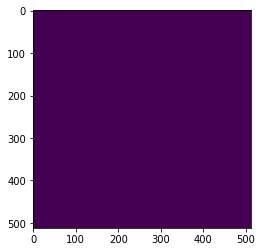

0
[0]


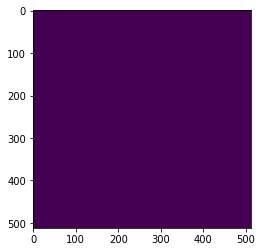

1
[  0 255]


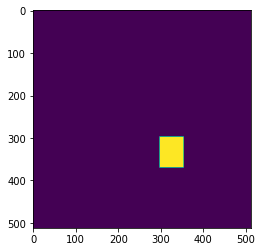

1
[  0 255]


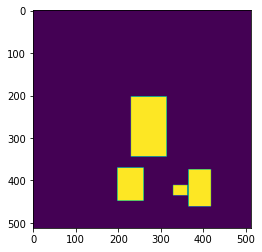

0
[0]


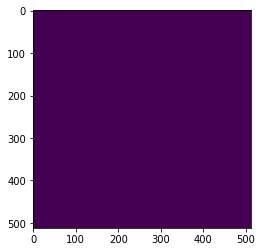

0
[0]


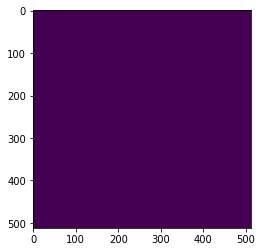

0
[0]


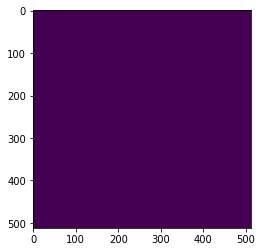

1
[  0 255]


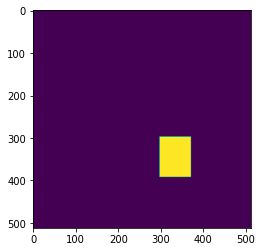

1
[  0 255]


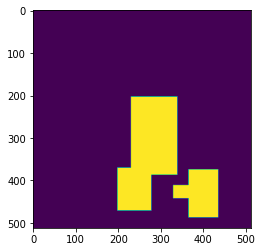

0
[0]


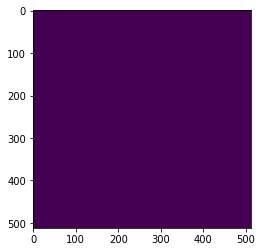

0
[0]


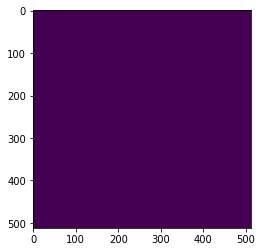

0
[0]


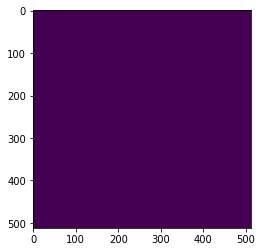

1
[  0 255]


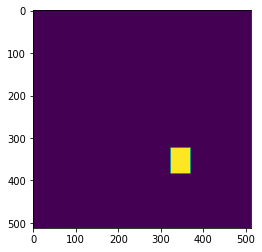

1
[  0 255]


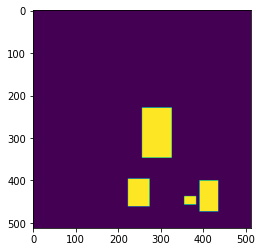

0
[0]


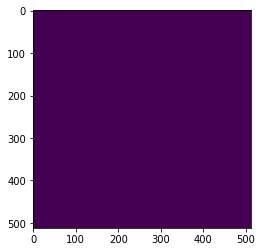

0
[0]


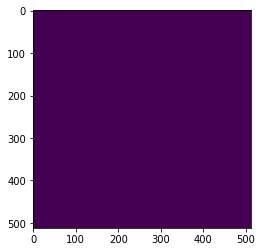

0
[0]


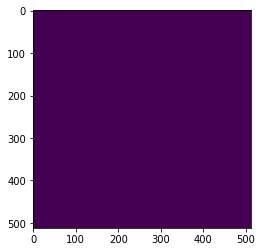

1
[  0 255]


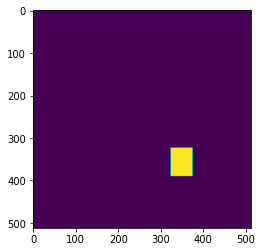

1
[  0 255]


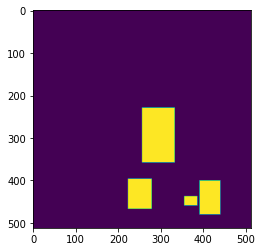

0
[0]


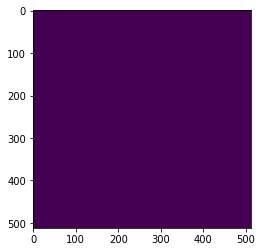

0
[0]


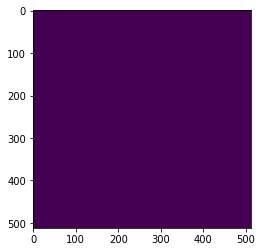

0
[0]


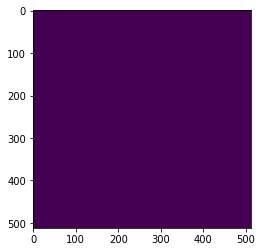

1
[  0 255]


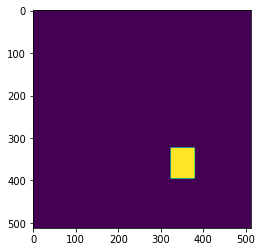

1
[  0 255]


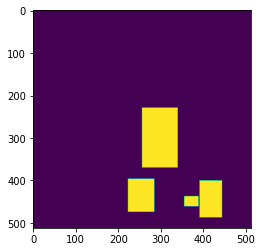

0
[0]


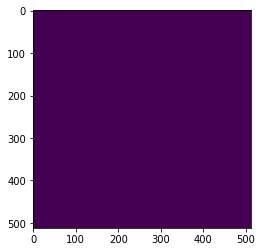

0
[0]


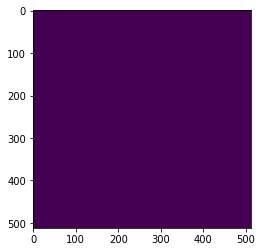

0
[0]


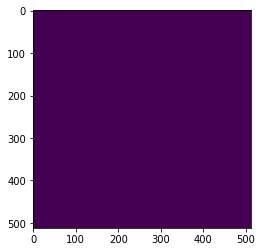

1
[  0 255]


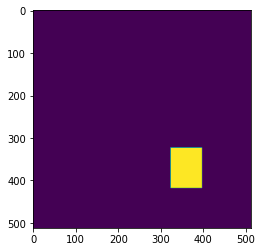

1
[  0 255]


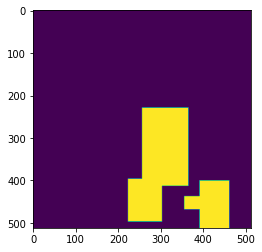

0
[0]


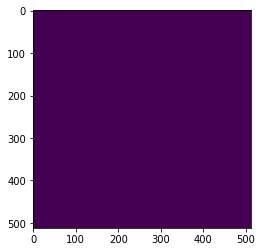

1
[  0 255]


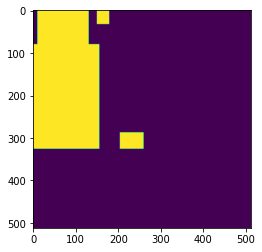

0
[0]


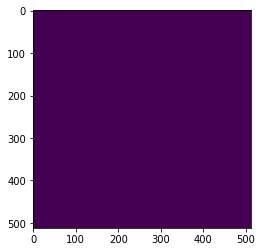

1
[  0 255]


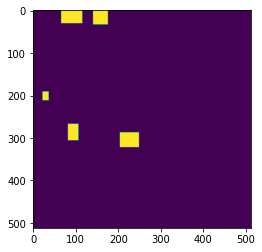

0
[0]


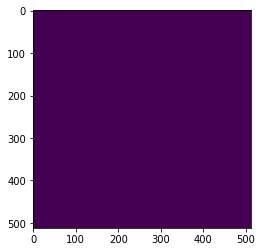

0
[0]


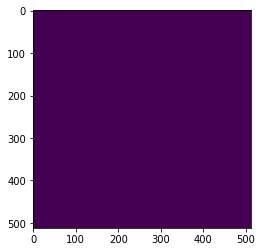

1
[  0 255]


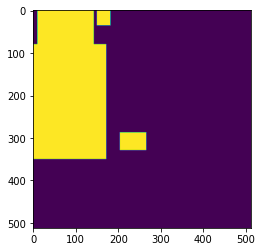

0
[0]


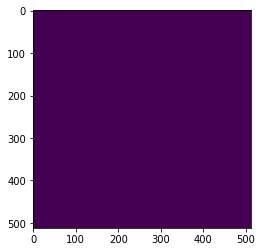

1
[  0 255]


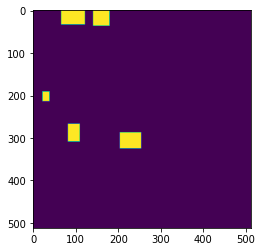

0
[0]


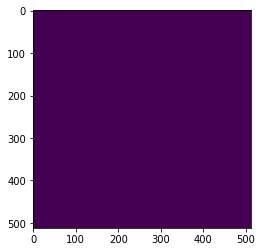

0
[0]


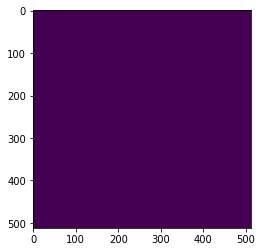

In [18]:
attrs = sorted(glob.glob(path + "*.png"))

for i in range(50):
    print(load_mask(attrs[i]))
    data = np.array(Image.open(attrs[i]))
    print(np.unique(data))
    plt.imshow(data)
    plt.show()
    


In [20]:
masks = glob.glob(path + "*.png")
names = list(map(lambda x: x.split(path)[1], masks))
items = list(map(lambda x: x.split("_"), names))
codes = list(map(lambda x: x[1], items))
types = list(map(lambda x: "_".join(x[3:]).split(".")[0], items))


# names, items, codes, types

diseases = np.array(sorted(list(set(types))))
assert len(types) == len(codes)
assert len(types) == len(masks)


In [21]:
result_dict = {}
for path, code, typ in tqdm(list(zip(masks, codes, types))):
    if code in result_dict:
        labels = result_dict[code]
    else:
        labels = np.zeros(len(diseases))
        result_dict[code] = labels
    idx = np.where(diseases == typ)
    labels[idx] = load_mask(path)
full_cnt = len(result_dict)



100%|██████████| 17000/17000 [00:28<00:00, 603.92it/s]


In [22]:
result_dict

{'9999991': array([0., 0., 1., 1., 0.]),
 '9999916': array([0., 1., 1., 0., 0.]),
 '9999994': array([0., 0., 1., 1., 0.]),
 '9999918': array([0., 1., 1., 0., 0.]),
 '9999912': array([0., 1., 1., 0., 0.]),
 '9999998': array([0., 0., 1., 1., 0.]),
 '9999921': array([0., 1., 1., 0., 0.]),
 '9999917': array([0., 1., 1., 0., 0.]),
 '9999990': array([0., 0., 1., 1., 0.]),
 '9999924': array([0., 0., 1., 1., 0.]),
 '9999992': array([0., 0., 1., 1., 0.]),
 '9999996': array([0., 0., 1., 1., 0.]),
 '9999925': array([0., 0., 1., 1., 0.]),
 '9999999': array([0., 0., 1., 1., 0.]),
 '9999926': array([0., 0., 1., 1., 0.]),
 '9999923': array([0., 1., 1., 0., 0.]),
 '9999920': array([0., 1., 1., 0., 0.]),
 '9999928': array([0., 0., 1., 1., 0.]),
 '9999922': array([0., 1., 1., 0., 0.]),
 '9999995': array([0., 0., 1., 1., 0.]),
 '9999929': array([0., 0., 1., 1., 0.]),
 '9999913': array([0., 1., 1., 0., 0.]),
 '9999910': array([0., 1., 1., 0., 0.]),
 '9999914': array([0., 1., 1., 0., 0.]),
 '9999927': arra

In [23]:
generated_prefix = "images/pix2pix_datasets/p2p_normalized_no_inst/l2s_bb_no_inst/test_latest/images"
dataset_name = "with_fake_images_{}.csv"

seeds = [i for i in range(0, 10)]
for seed in seeds:
    rs = RandomState(seed)
    result = list(result_dict.items())
    result.sort(key=lambda x: x[0])
    result = rs.permutation(result)
    indices = list(map(lambda x: x[0], result))
    result = list(map(lambda x: x[1], result))
    indices_result = list(map(lambda x: os.path.join(generated_prefix, "ISIC_" + x + "_semantic_synthesized_image.jpg"), indices))
    frame = pd.DataFrame(result, index=indices_result, columns=diseases, dtype='int64')
    frame.to_csv(dataset_name.format(seed), index_label="images")
    

/nfs/home/nduginets/miniconda3/envs/with_torch/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [24]:
# merge them!

def merge_to_csv(csv_a, csv_b, name):
    res = pd.concat([csv_a, csv_b])
    res.to_csv(name, index=False)

fake_csv = sorted(glob.glob("./with_fake_images_*.csv"))

merge_to_csv(pd.read_csv(fake_csv[0]), pd.read_csv(fake_csv[1]), "fake.csv")

In [25]:
folders = [
    "baseline+fake_boxed",
    "baseline_bussio_+fake_boxed",
    "baseline+pix2pix_non_boxed+fake_boxed",
    "baseline_bussio+pix2pix_non_boxed+fake_boxed",
    "baseline+pix2pix_boxed+fake_boxed",
    "baseline_bussio+pix2pix_boxed+fake_boxed"
]
for f in folders:
    os.makedirs(f, exist_ok=True)


fake_csv_list = [fake_csv] * len(folders)

In [26]:

fake_csv = sorted(glob.glob("./with_fake_images_*.csv"))


base_path = "/nfs/home/nduginets/master-diploma"

baseline = sorted(glob.glob(os.path.join(base_path, "splits", "baseline", "train_*.csv")))
baseline_bussio = sorted(glob.glob(os.path.join(base_path, "splits", "baseline_bussio", "train_*.csv")))
pix2pix_non_boxed = sorted(glob.glob(os.path.join(base_path, "splits", "generated", "train_180_*.csv")))
pix2pix_non_boxed_bussio = sorted(glob.glob(os.path.join(base_path, "splits", "generated_bussio", "train_180_*.csv")))
pix2pix_boxed = sorted(glob.glob(os.path.join(base_path, "splits_boxed", "generated", "train_180_*.csv")))
pix2pix_boxed_bussio = sorted(glob.glob(os.path.join(base_path, "splits_boxed", "generated_bussio", "train_180_*.csv")))

assert len(baseline) == 10
assert len(baseline_bussio) == 10
assert len(pix2pix_non_boxed) == 10
assert len(pix2pix_non_boxed_bussio) == 10
assert len(pix2pix_boxed) == 10
assert len(pix2pix_boxed_bussio) == 10

created_early = [
    baseline,
    baseline_bussio,
    pix2pix_non_boxed,
    pix2pix_non_boxed_bussio,
    pix2pix_boxed,
    pix2pix_boxed_bussio
]

folder_eraly_now = list(zip(folders, created_early, fake_csv_list))


In [27]:
for f, e_l, n_l in folder_eraly_now:
    for idx, (e, n) in enumerate(zip(e_l, n_l)):
        path = os.path.join(f, "train_{}.csv".format(idx))
        merge_to_csv(pd.read_csv(e), pd.read_csv(n), path)
